In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset
df = pd.read_csv("Food_preference.csv")

In [3]:
# Display first few rows
print(df.head())

                     Timestamp Participant_ID  Gender Nationality  Age  \
0  2019/05/07 2:59:13 PM GMT+8         FPS001    Male      Indian   24   
1  2019/05/07 2:59:45 PM GMT+8         FPS002  Female      Indian   22   
2  2019/05/07 3:00:05 PM GMT+8         FPS003    Male      Indian   31   
3  2019/05/07 3:00:11 PM GMT+8         FPS004  Female      Indian   25   
4  2019/05/07 3:02:50 PM GMT+8         FPS005    Male      Indian   27   

               Food              Juice Dessert  
0  Traditional food        Fresh Juice   Maybe  
1      Western Food  Carbonated drinks     Yes  
2      Western Food        Fresh Juice   Maybe  
3  Traditional food        Fresh Juice   Maybe  
4  Traditional food        Fresh Juice   Maybe  


In [5]:
# Convert Timestamp
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='mixed',errors='coerce')

In [6]:
# ------------------- Basic Summary -------------------
print("\nDataset Info:\n")
print(df.info())

print("\nSummary Statistics:\n")
print(df.describe(include='all'))


Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype                    
---  ------          --------------  -----                    
 0   Timestamp       288 non-null    datetime64[ns, UTC-08:00]
 1   Participant_ID  288 non-null    object                   
 2   Gender          284 non-null    object                   
 3   Nationality     288 non-null    object                   
 4   Age             288 non-null    int64                    
 5   Food            288 non-null    object                   
 6   Juice           288 non-null    object                   
 7   Dessert         288 non-null    object                   
dtypes: datetime64[ns, UTC-08:00](1), int64(1), object(6)
memory usage: 18.1+ KB
None

Summary Statistics:

                                  Timestamp Participant_ID  Gender  \
count                                   288            288     284   
un

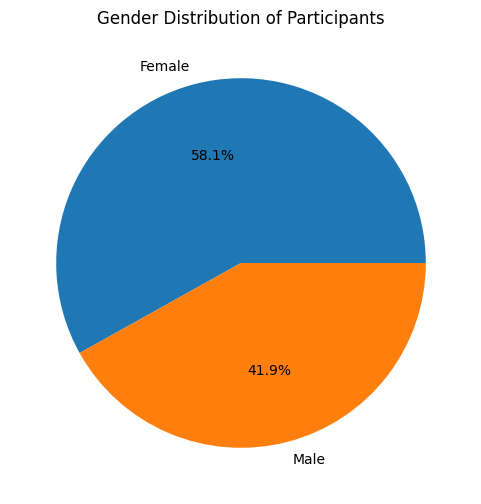

In [7]:
# ------------------- Gender Distribution -------------------
gender_count = df['Gender'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(gender_count, labels=gender_count.index, autopct='%1.1f%%')
plt.title("Gender Distribution of Participants")
plt.show()

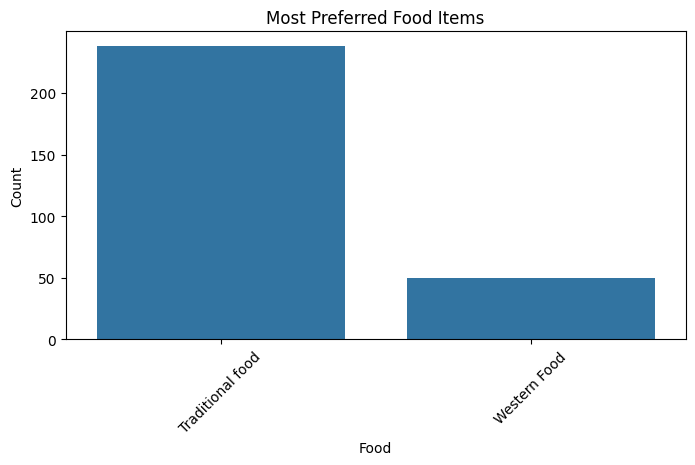

In [8]:
# ------------------- Food Preferences -------------------
food_count = df['Food'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(x=food_count.index, y=food_count.values)
plt.title("Most Preferred Food Items")
plt.xlabel("Food")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

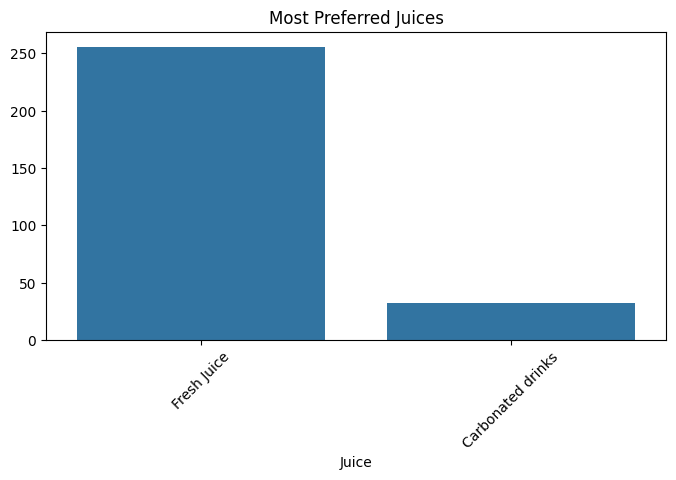

In [9]:
# ------------------- Juice Preferences -------------------
juice_count = df['Juice'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(x=juice_count.index, y=juice_count.values)
plt.title("Most Preferred Juices")
plt.xticks(rotation=45)
plt.show()

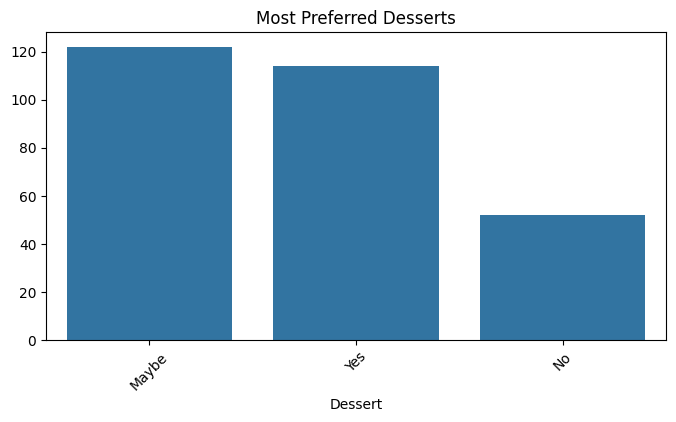

In [10]:
# ------------------- Dessert Preferences -------------------
dessert_count = df['Dessert'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(x=dessert_count.index, y=dessert_count.values)
plt.title("Most Preferred Desserts")
plt.xticks(rotation=45)
plt.show()

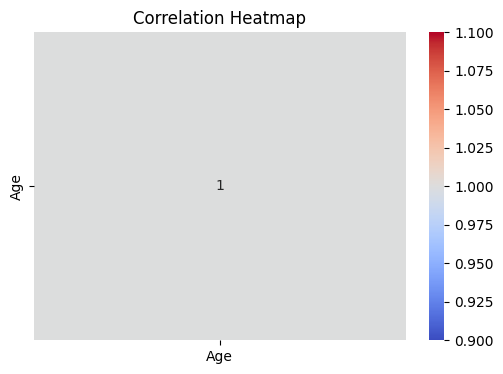

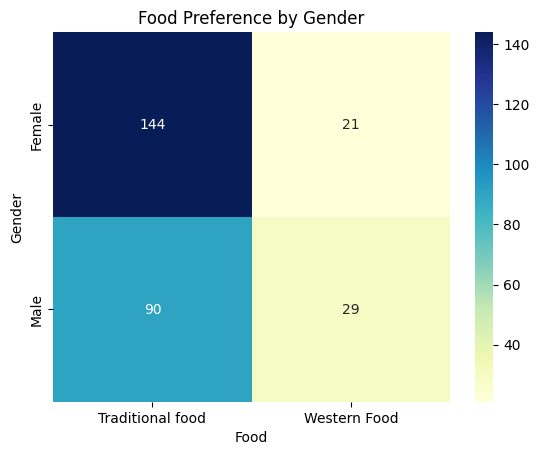

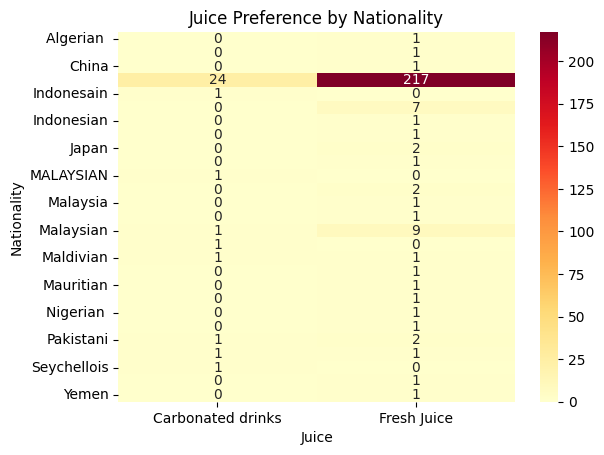

In [14]:
# Heatmap with only numeric values
df_numeric = df.copy()

# Convert Age to numeric
df_numeric['Age'] = pd.to_numeric(df_numeric['Age'], errors='coerce')

# Select numeric columns only
numeric_cols = df_numeric.select_dtypes(include=['number'])

plt.figure(figsize=(6,4))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

cross_tab = pd.crosstab(df['Gender'], df['Food'])
sns.heatmap(cross_tab, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Food Preference by Gender")
plt.show()

cross_tab2 = pd.crosstab(df['Nationality'], df['Juice'])
sns.heatmap(cross_tab2, annot=True, fmt="d", cmap="YlOrRd")
plt.title("Juice Preference by Nationality")
plt.show()